Hello Deborah!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you so much for the feedback, I appreacaite it! I should have double checked before submitting. Thanks! 
</div>


<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>

Thank you for the feedback. I have changed the bootstrapping function so that, when it is called, it now sends the originally trained model (one for each region), so the model gets trained one time only. Thank you for telling me about that. I am new to bootstrapping. Also, the confidence interval results are now different because of that. Also, I am now only sampling 500 "points", inside the bootstrapping function, and now the probability loss ouputs much lower numbers.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Now the results are correct. Well done! But why there is no suggested region? Region 2 has a risk lower than 2.5%. This is the main criteria to suggest the region. So, you need to modify the logic for suggesting to pick the region 2 as a best region.

</div>

# Oily Giant Mining; Geological Exploration, by Deborah Thomas

### Data Mining Study of Three Geographical Regions
#### Objective:
This data mining study will evaluate three of Oily Giant's geographical regions to determine the best site for 200 new wells.
#### Goals:
1. **Profit Margin**:
   - Identify which geographical region has the highest profit margin.
2. **Revenue Prediction**:
   - Estimate the revenue for these 200 new wells.
3. **Profitability Threshold**:
   - Determine the minimum volume of oil necessary to make a profit.
#### Approach:
- **Data Analysis**:
  - Study existing oil quality and volume of reserves in each geographical region.
 
- **Predictive Modeling**:
  - Build a predictive model to identify the geographic location with the highest profit potential.
  - Predict the volume of reserves for the new 200 wells.
- **Risk Evaluation**:
  - Use bootstrapping to find the confidence interval for the predictions.
  - Evaluate the risk of losses ensuring that the risk is no greater than 2.5%.
#### Methodology:
1. **Data Collection**:
   - Gather data on oil quality and reserve volumes for the three regions.
 
2. **Model Training**:
   - Train a predictive model based on the collected data.
3. **Profit Calculation**:
   - Calculate the potential profit for each region based on the model's predictions.
4. **Risk Assessment**:
   - Perform bootstrapping to evaluate the risk of losses.
5. **Decision Making**:
   - Recommend the best geographical region for the new wells based on profit potential and risk assessment.

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Import libraries</div>

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from IPython.display import display, HTML

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.io as pio

from termcolor import colored

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Load in 3 datasets:</div>

### ( 1 dataset for each region )

In [10]:
try:
    region1 = pd.read_csv('/datasets/geo_data_0.csv')  # Attempt to read from the server path
except FileNotFoundError:
    region1 = pd.read_csv('../datasets/geo_data_0.csv')  # Fallback to the local path


display(region1.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [11]:
try:
    region2 = pd.read_csv('/datasets/geo_data_1.csv')  # Attempt to read from the server path
except FileNotFoundError:
    region2 = pd.read_csv('../datasets/geo_data_1.csv')  # Fallback to the local path


display(region2.head(10))

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [12]:
try:
    region3 = pd.read_csv('/datasets/geo_data_2.csv')  # Attempt to read from the server path
except FileNotFoundError:
    region3 = pd.read_csv('../datasets/geo_data_2.csv')  # Fallback to the local path


display(region3.head(10))

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


### Explanation of the columns :
- id: unique oil well identifier
- f0, f1, f2: three features of points
- product: volume of reserves in the oil well (per thousand barrels).

### Explanation of value of each unit:

- 1 barrel\'s worth = \$4.50 USD.
- 1 unit = 1,000 barrels
- 1 unit's worth = **\$4.50** times 1,000 = **\$4,500 USD**

In [15]:
print("Region 1 dataset:")
print(region1.shape)

Region 1 dataset:
(100000, 5)


In [16]:
print("Region 2 dataset:")
print(region2.shape)

Region 2 dataset:
(100000, 5)


In [17]:
print("Region 3 dataset:")
print(region3.shape)

Region 3 dataset:
(100000, 5)


#### All 3 datasets have the same amount of rows and columns.

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Clean the Data</div>

In [20]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Rename columns:

#### Change 'id' to 'well_id' to make it clear that each row represents one well.  Change 'products' to 'vol_reseres' to make it clear that this column is the total volume of reserves.

In [23]:
region1.rename(columns={
    'id': 'well_id',
    'product': 'vol_reserves'
}, inplace=True)

In [24]:
region1.columns

Index(['well_id', 'f0', 'f1', 'f2', 'vol_reserves'], dtype='object')

In [25]:
region2.rename(columns={
    'id': 'well_id',
    'product': 'vol_reserves'
}, inplace=True)

In [26]:
region2.columns

Index(['well_id', 'f0', 'f1', 'f2', 'vol_reserves'], dtype='object')

In [27]:
region3.rename(columns={
    'id': 'well_id',
    'product': 'vol_reserves'
}, inplace=True)

In [28]:
region3.columns

Index(['well_id', 'f0', 'f1', 'f2', 'vol_reserves'], dtype='object')

#### Datatypes, on all three datasets, looks good.

#### There is no missing data, on any of the three datasets.

### Drop duplicates

In [32]:
region1 = region1.drop_duplicates(subset='well_id')

In [33]:
region1.shape

(99990, 5)

In [34]:
region2 = region2.drop_duplicates(subset='well_id')

In [35]:
region2.shape

(99996, 5)

In [36]:
region3 = region3.drop_duplicates(subset='well_id')

In [37]:
region3.shape

(99996, 5)

#### Data is clean

#### ... but, region1 now has 6 fewer rows than region2 and region3.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Exploratory data analysis:</div>

## <span style="color:blue;">Region 1:</span>

In [43]:
region1.describe()

,f0,f1,f2,vol_reserves
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


In [44]:
# Generate the summary statistics
summary_stats_reg1 = region1.describe()

In [45]:
# Extract the mean value for the 'product' column
mean_reserves_reg1 = round(summary_stats_reg1.loc['mean', 'vol_reserves'], 2)
print(mean_reserves_reg1)

92.5


In [46]:
# Extract the mean value for the features
mean_f0_reg1 = round(summary_stats_reg1.loc['mean', 'f0'], 2)
mean_f1_reg1 = round(summary_stats_reg1.loc['mean', 'f1'], 2)
mean_f2_reg1 = round(summary_stats_reg1.loc['mean', 'f2'], 2)

In [47]:
# HTML styled string
formatted_string_reg1_mean = f'<span style="color:blue; font-size:16px;">The average amount of oil reserves, in region 1 is: &nbsp; {mean_reserves_reg1:.2f}</span>'
formatted_string_reg1_mean_features = f'<span style="color:blue; font-size:16px;">The mean values of features, in region 1 are: &nbsp; f0: &nbsp; {mean_f0_reg1:.2f}, &nbsp;f1: &nbsp; {mean_f1_reg1:.2f}, &nbsp;f2: &nbsp;{mean_f2_reg1:.2f}</span>'

# Display the formatted string
display(HTML(formatted_string_reg1_mean))
display(HTML(formatted_string_reg1_mean_features))

In [48]:
# Data for plotting region1 mean values
features = ['f0', 'f1', 'f2', 'vol_reserves']
values = [mean_f0_reg1, mean_f1_reg1, mean_f2_reg1, mean_reserves_reg1]

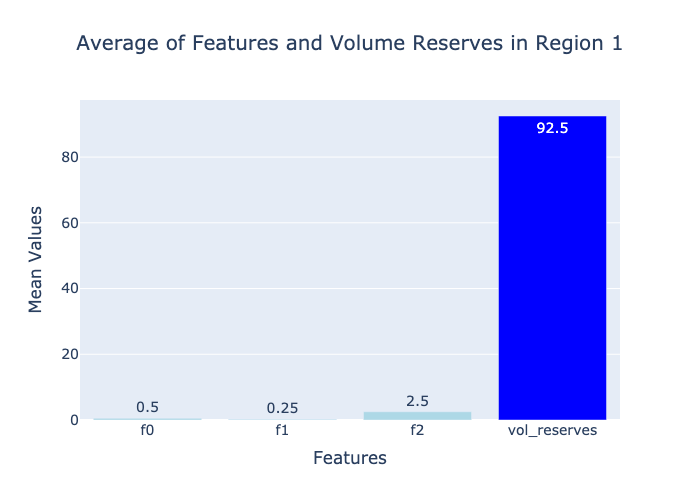

In [49]:
pio.renderers.default = 'png'

# Create a bar plot
fig1 = go.Figure(data=[
    go.Bar(
        x=features, 
        y=values, 
        marker_color=['lightblue', 'lightblue', 'lightblue', 'blue'],
        text=values,  # hover text uses 'text' attribute
        hoverinfo='text',  # display text when hovering
    )
])

# Add titles and labels
fig1.update_layout(
    title={
        'text': 'Average of Features and Volume Reserves in Region 1',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
    },
    xaxis_title='Features',
    yaxis_title='Mean Values',
    font=dict(size=14),
)

fig1.show()

## <span style="color:limegreen;">Region 2:</span>

In [51]:
region2.describe()

,f0,f1,f2,vol_reserves
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [52]:
# Generate the summary statistics
summary_stats_reg2 = region2.describe()

In [53]:
# Extract the mean value for the 'product' column
mean_reserves_reg2 = round(summary_stats_reg2.loc['mean', 'vol_reserves'], 2)
print(mean_reserves_reg2)

68.82


In [54]:
# Extract the mean value for the features
mean_f0_reg2 = round(summary_stats_reg2.loc['mean', 'f0'], 2)
mean_f1_reg2 = round(summary_stats_reg2.loc['mean', 'f1'], 2)
mean_f2_reg2 = round(summary_stats_reg2.loc['mean', 'f2'], 2)

In [55]:
# HTML styled string
formatted_string_reg2_mean_reserves = f'<span style="color:limegreen; font-size:16px;">The average amount of oil reserves, in region 2 is: &nbsp;  {mean_reserves_reg2:.2f}</span>'
formatted_string_reg2_mean_features = f'<span style="color:limegreen; font-size:16px;">The mean values of features, in region 2 are: &nbsp; f0:&nbsp; {mean_f0_reg2:.2f}, &nbsp;f1:&nbsp; {mean_f1_reg2:.2f}, &nbsp; f2: &nbsp;{mean_f2_reg2:.2f}</span>'

# Display the formatted string
display(HTML(formatted_string_reg2_mean_reserves))
display(HTML(formatted_string_reg2_mean_features))

In [56]:
# Data for plotting region2 mean values
features2 = ['f0', 'f1', 'f2', 'vol_reserves']
values2 = [mean_f0_reg2, mean_f1_reg2, mean_f2_reg2, mean_reserves_reg2]

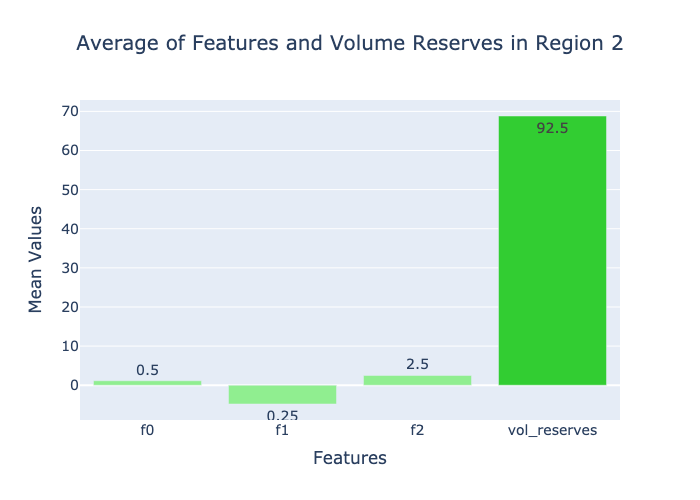

In [57]:
# Create a bar plot
fig2 = go.Figure(data=[
    go.Bar(
        x=features2, 
        y=values2, 
        marker_color=['lightgreen', 'lightgreen', 'lightgreen', 'limegreen'],
        text=values,  # hover text uses 'text' attribute
        hoverinfo='text',  # display text when hovering
    )
])

# Add titles and labels
fig2.update_layout(
    title={
        'text': 'Average of Features and Volume Reserves in Region 2',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
    },
    xaxis_title='Features',
    yaxis_title='Mean Values',
    font=dict(size=14),
)

fig2.show()

#### Interesting... f1 mean is below zero.

## <span style="color:orange;">Region 3:</span>

In [60]:
region3.describe()

,f0,f1,f2,vol_reserves
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


In [61]:
# Generate the summary statistics
summary_stats_reg3 = region3.describe()

In [62]:
# Extract the mean value for the 'product' column
mean_reserves_reg3 = round(summary_stats_reg3.loc['mean', 'vol_reserves'], 2)
print(mean_reserves_reg3)

95.0


In [63]:
# Extract the mean value for the features
mean_f0_reg3 = round(summary_stats_reg3.loc['mean', 'f0'], 2)
mean_f1_reg3 = round(summary_stats_reg3.loc['mean', 'f1'], 2)
mean_f2_reg3 = round(summary_stats_reg3.loc['mean', 'f2'], 2)

In [64]:
# HTML styled string
formatted_string_reg3_mean_reserves = f'<span style="color:orange; font-size:16px;">The average amount of oil reserves, in region 3 is: &nbsp; {mean_reserves_reg3:.2f}</span>'
formatted_string_reg3_mean_features = f'<span style="color:orange; font-size:16px;">The mean values of features, in region 3 are: &nbsp; f0: &nbsp; {mean_f0_reg3:.2f}, &nbsp; f1: &nbsp; {mean_f1_reg3:.2f}, &nbsp; f2: &nbsp; {mean_f2_reg3:.2f}</span>'

# Display the formatted string
display(HTML(formatted_string_reg3_mean_reserves))
display(HTML(formatted_string_reg3_mean_features))

In [65]:
# Data for plotting region2 mean values
features3 = ['f0', 'f1', 'f2', 'vol_reserves']
values3 = [mean_f0_reg3, mean_f1_reg3, mean_f2_reg3, mean_reserves_reg3]

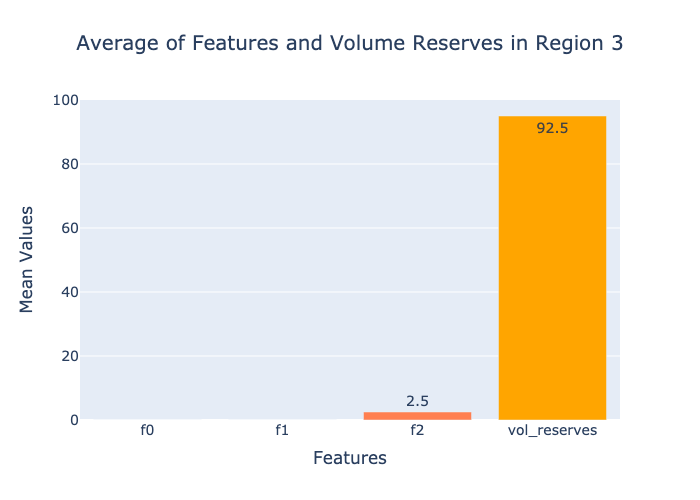

In [66]:
# Create a bar plot
fig3 = go.Figure(data=[
    go.Bar(
        x=features3, 
        y=values3, 
        marker_color=['coral', 'coral', 'coral', 'orange'],
        text=values,  # hover text uses 'text' attribute
        hoverinfo='text',  # display text when hovering
    )
])

# Add titles and labels
fig3.update_layout(
    title={
        'text': 'Average of Features and Volume Reserves in Region 3',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
    },
    xaxis_title='Features',
    yaxis_title='Mean Values',
    font=dict(size=14),
)

fig3.show()

#### f0 and f1 mean are both very close to zero, so nothing shows on the graph for those means.

<div style="color: red; padding: 10px;">
    <h3>Volume of Reserves for all 3 regions:</h3>
</div>

In [69]:
# Data for plotting
regions = ['Region 1', 'Region 2', 'Region 3']
mean_vol_reserves = [mean_reserves_reg1, mean_reserves_reg2, mean_reserves_reg3]
colors = ['blue', 'limegreen', 'orange']

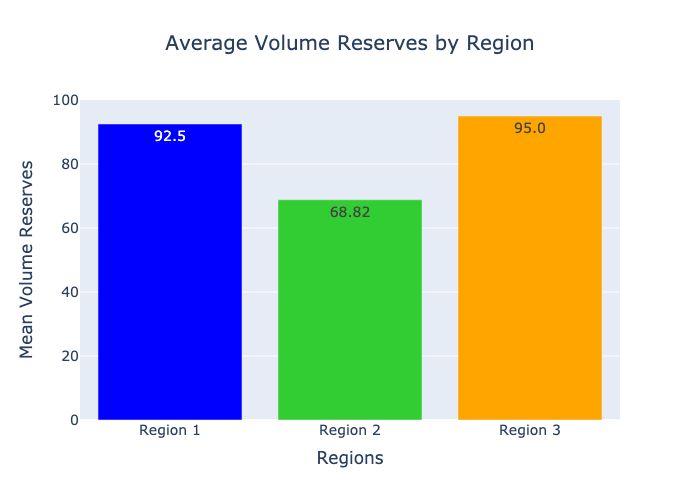

In [70]:
# Create a bar plot
fig = go.Figure(data=[
    go.Bar(
        x=regions, 
        y=mean_vol_reserves, 
        marker_color=colors,
        text=mean_vol_reserves,  # hover text uses 'text' attribute
        hoverinfo='text',  # display text when hovering
    )
])

# Add titles and labels
fig.update_layout(
    title={
        'text': 'Average Volume Reserves by Region',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
    },
    xaxis_title='Regions',
    yaxis_title='Mean Volume Reserves',
    font=dict(size=14),
)

fig.show()

<div style="color: red; padding: 10px;">
    <h3>Check the correlation between features and the target:</h3>
</div>

In [72]:
region1.corr(numeric_only=True)

,f0,f1,f2,vol_reserves
f0,1.000000,-0.440717,-0.003211,0.143504
f1,-0.440717,1.000000,0.001764,-0.192351
f2,-0.003211,0.001764,1.000000,0.483631
vol_reserves,0.143504,-0.192351,0.483631,1.000000


In [73]:
region2.corr(numeric_only=True)

,f0,f1,f2,vol_reserves
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
vol_reserves,-0.030523,-0.010154,0.999397,1.000000


In [74]:
region3.corr(numeric_only=True)

,f0,f1,f2,vol_reserves
f0,1.000000,0.000506,-0.000452,-0.001978
f1,0.000506,1.000000,0.000753,-0.001055
f2,-0.000452,0.000753,1.000000,0.445867
vol_reserves,-0.001978,-0.001055,0.445867,1.000000


## Understanding Correlation
Correlation measures the strength and direction of the linear relationship between two variables. The numbers range from -1 to 1.

### Positive Correlation (0 < r ≤ 1):
As one variable increases, the other variable also tends to increase.
- **0.7 to 1.0**: Strong positive relationship.
- **0.3 to 0.7**: Moderate positive relationship.
- **0 to 0.3**: Weak positive relationship.

### Negative Correlation (-1 ≤ r < 0):
As one variable increases, the other variable tends to decrease.
- **-0.7 to -1.0**: Strong negative relationship.
- **-0.3 to -0.7**: Moderate negative relationship.
- **0 to -0.3**: Weak negative relationship.

### No Correlation (r ≈ 0):
No consistent linear relationship.

### Interpretation of Correlation Results:
- **Region 2** has a very strong correlation between `f2` and `vol_reserves`, suggesting that `f2` is a strong predictor of reserves in this region.
- **Region 1** and **Region 3** also show a modest relationship between `f2` and `vol_reserves`, but it's not as strong as in Region 2.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Good job!

</div>

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Predictions for best location for new well:</div>

<h2><b>This section will:</b></h2>
<ul>
    <li>Split the data into training and validation sets.</li>
    <li>Train a linear regression model for each region.</li>
    <li>Evaluate the model's performance using RMSE (Root Mean Squared Error).</li>
    <li>Calculate predicted profit.</li>
    <li>Bootstrapping</li>
</ul>

<div style="color: red; padding: 10px;">
    <h3>Split the 3 datasets:</h3>
</div>

In [80]:
#The column names are the same for all three datasets (region1, region2, and region3), so this only has to be done once.
feature_columns = [col for col in region1.columns if col not in ['well_id', 'vol_reserves']]
target_column = 'vol_reserves'

print("Features: ")
print(feature_columns)

print('\n')
print("Target: ")
print(target_column)

Features: 
['f0', 'f1', 'f2']


Target: 
vol_reserves


In [81]:
def split_data(df, feature_cols, target_col, test_size=0.25, random_state=12345):
    # Split the data into features and target sets
    features = df[feature_cols]
    target = df[target_col]

    # Split the data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )
    
    return features_train, features_valid, target_train, target_valid

### Call the split_data function

In [83]:
features_train1, features_valid1, target_train1, target_valid1 = split_data(region1, feature_columns, target_column)
features_train2, features_valid2, target_train2, target_valid2 = split_data(region2, feature_columns, target_column)
features_train3, features_valid3, target_train3, target_valid3 = split_data(region3, feature_columns, target_column)

In [84]:
len(features_train2)

74997

In [85]:
len(features_valid2)

24999

In [86]:
len(target_train2)

74997

In [87]:
len(target_valid2)

24999

- <b>Features: variables (input data) used to make predictions.</b>
<br>
- <b>Target:  variable (output data) that I am trying to predict.</b>

<H3>Purpose of Each Split</H3>
<br>
1. <b>features_train:</b> 75% of the feature data.
<br>
Purpose: Used to train the machine learning model. The model learns the patterns and relationships within this data.
<br>
<br>
2. <b>features_valid:</b> 25% of the feature data.
<br>
Purpose: Used to validate the model’s performance. This data is not seen by the model during training, providing an unbiased evaluation of the model’s predictive performance.

<br>   
<br>
3. <b>target_train:</b> 75% of the target data.
<br>
Purpose: Represents the actual target values corresponding to features_train. The model uses this data during training to learn the mapping from features to target values.
<br>
<br>
4. <b>target_valid:</b> 25% of the target data.<br>
Purpose: Represents the actual target values corresponding to features_valid. Used to evaluate the model’s performance by comparing the model's predictions to these actual values.

<div style="color: red; padding: 10px;">
    <h3>Create / Fit / Evaluate the Models:</h3>
</div>

In [91]:
def train_and_evaluate(features_train_scaled, features_valid_scaled, target_train, target_valid):
    # Initialize the model
    model = LinearRegression()
    
    # Train the model
    model.fit(features_train_scaled, target_train)
    
    # Predict on the validation set
    predictions = model.predict(features_valid_scaled)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    
    # Calculate the average volume of predicted reserves
    avg_reserves = np.mean(predictions)
    
    # Return the model and the RMSE
    return model, rmse, avg_reserves, predictions

<div style="color: red; padding: 10px;">
    <h3>Call the Train / Evaluate function:</h3>
</div>

In [93]:
# Train and evaluate region 1 using scaled features
model1, rmse1, avg_reserves1, predictions1 = train_and_evaluate(features_train1, features_valid1, target_train1, target_valid1)
print(f"\033[94mRegion 1 RMSE: {rmse1:.2f}\nAverage Predicted Reserves: {avg_reserves1:.2f}\033[0m")


Region 1 RMSE: 37.85
Average Predicted Reserves: 92.79


In [94]:
# Train and evaluate region 2
model2, rmse2, avg_reserves2, predictions2 = train_and_evaluate(features_train2, features_valid2, target_train2, target_valid2)
print(colored(f"Region 2 RMSE: {rmse2:.2f}\nAverage Predicted Reserves: {avg_reserves2:.2f}", 'green'))


Region 2 RMSE: 0.89
Average Predicted Reserves: 69.18


In [95]:
# Train and evaluate region 3
model3, rmse3, avg_reserves3, predictions3 = train_and_evaluate(features_train3, features_valid3, target_train3, target_valid3)
print(f"\033[38;5;208mRegion 3 RMSE: {rmse3:.2f}\nAverage Predicted Reserves: {avg_reserves3:.2f}\033[0m")

Region 3 RMSE: 40.08
Average Predicted Reserves: 94.87


### RMSE outcomes(considering that the scale of the vol_reserves data is pretty low):

- region 1's RMSE score, of 37.85 is poor. There is high error in the model.
- region 2's RMSE score, of 0.89 is great. There is a very small error in the predictions.
- region 3's RMSE score, of 40 is poor. There is high error in the model.

### Predicted oil reserves outcome:

- Region 1 and region3 have the highest level of predicted oil reserves.
- Region 2 had the lowest predicted level of oil reserves.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Well done!

</div>

<div style="color: red; padding: 10px;">
    <h3>Pick the top 200 wells, from each region, with the highest values of predictions:</h3>
</div>

In [99]:
#find the top 200 predictions for each set of predictions
#take the predictions from the model for each region
def get_top_n_predictions(predictions, top_n=200):
    # sort the predictions in descending order
    sorted_predictions = sorted(predictions, reverse=True)
    
    # get the top 200 predictions
    top_predictions = sorted_predictions[:top_n]
    return top_predictions

In [100]:
# Call the get_top_n_predictions function for each region 
top_n = 200
top_wells_high_val_pred1 = get_top_n_predictions(predictions1, top_n)
top_wells_high_val_pred2 = get_top_n_predictions(predictions2, top_n)
top_wells_high_val_pred3 = get_top_n_predictions(predictions3, top_n)

In [101]:
print(top_wells_high_val_pred1[:200])

[195.4677822434477, 176.29639458834419, 176.14101597424934, 173.65209220087206, 171.60114500994712, 170.06424104800575, 168.92763939374953, 168.47555018495518, 167.51727490188543, 166.81784232902623, 166.67046610281966, 166.2112262708947, 165.6081858491106, 165.21408397416883, 165.0965624458903, 165.0256089088159, 164.97812897153136, 164.43258267247188, 164.05272844544248, 164.02290933264572, 163.9093487629548, 163.65847486647175, 162.95883179962823, 162.94275625648729, 162.56502269303738, 162.46579863456904, 162.2641625144177, 162.1310432747408, 162.0706946463654, 161.5679597760672, 161.40512866202425, 161.304605051622, 161.29142229542737, 161.2469418632464, 161.032086981877, 160.8865847499274, 160.76073812147712, 160.6332228070436, 160.50688866743155, 160.4050676444537, 160.17859614013386, 160.13905629109115, 160.00099606410356, 159.8521981501547, 159.06610176640498, 158.66972349087925, 158.62800028879718, 158.37288658484817, 158.36729057539395, 158.31507631308867, 157.88426845517898

In [102]:
# ANSI escape code for bold and blue
blue_bold = "\033[1m\033[38;2;0;0;255m"  # Bold and blue color
reset = "\033[0m"  # Reset text formatting to default

min_value1 = min(top_wells_high_val_pred1)

print('\n')
print(f"{blue_bold}Of the top 200 wells in region1, this is the amount of reserves in the lowest-performing well:{reset}")
print(f"{blue_bold}{min_value1:.2f}{reset}")

print('\n')
print(f"{blue_bold}Predicted mean of Region1 top 200 wells:{reset}")
mean_prediction1 = np.mean(top_wells_high_val_pred1)

print(f"{blue_bold}{mean_prediction1:.2f}{reset}")



Of the top 200 wells in region1, this is the amount of reserves in the lowest-performing well:
148.17


Predicted mean of Region1 top 200 wells:
155.35


In [103]:
print(top_wells_high_val_pred2[:200])

[139.9758316846204, 139.89452206537683, 139.84666732545247, 139.76604839955806, 139.6961658798282, 139.56498774497567, 139.55390373642376, 139.50916427596164, 139.4742841676624, 139.46603445717992, 139.4396521245402, 139.41736592157656, 139.38303473947238, 139.3816507771531, 139.3630285427325, 139.30465036458418, 139.2860389347805, 139.26164072085982, 139.24379834329523, 139.17913252509007, 139.15869387261267, 139.13677797340034, 139.1147863997819, 139.10838347325782, 139.0981688966162, 139.08427336492127, 139.0790669430156, 139.07295162217812, 139.0486058319166, 139.04593271639342, 139.02860639264296, 139.02170852712118, 139.0160697372968, 139.01289007208118, 139.00282337325717, 138.99983208966455, 138.99589332754715, 138.99455853588964, 138.98233193172965, 138.98133753556195, 138.97353433086317, 138.96220813124577, 138.94721837357162, 138.94480645742158, 138.94281902937993, 138.9275019654979, 138.92498977023266, 138.91844527060692, 138.90142084470438, 138.89986871781522, 138.89104303

In [104]:
# RGB for lime green: (50, 205, 50)
lime_green_bold = "\033[1m\033[38;2;50;205;50m"  # Bold and lime green color
reset = "\033[0m"  # Reset text formatting to default

min_value2 = min(top_wells_high_val_pred2)

print('\n')
print(f"{lime_green_bold}Of the top 200 wells in region2, this is the amount of reserves in the lowest-performing well:{reset}")
print(f"{lime_green_bold}{min_value2:.2f}{reset}")

print('\n')
print(f"{lime_green_bold}Predicted mean of Region2 top 200 wells:{reset}")
mean_prediction2 = np.mean(top_wells_high_val_pred2)

print(f"{lime_green_bold}{mean_prediction2:.2f}{reset}")




Of the top 200 wells in region2, this is the amount of reserves in the lowest-performing well:
138.38


Predicted mean of Region2 top 200 wells:
138.73


In [105]:
print(top_wells_high_val_pred3[:200])

[174.23741449493411, 173.16733448131657, 170.81604438871273, 166.60508580889308, 165.9892734194852, 162.54601715545, 162.38941617618826, 161.4474180092025, 161.12954231753997, 160.6910586523795, 160.6585989902033, 159.78697309921492, 159.51706368131184, 159.5022618037765, 158.58348550932223, 157.95890771641518, 157.92594453532428, 157.64283623497803, 157.33930987345784, 156.67167984748738, 156.6358583000399, 156.57901806728674, 156.46799185947737, 156.44373208458347, 156.28406752344887, 154.88795231190414, 154.8645063739961, 154.82756792628135, 154.4961705688453, 154.47028035413717, 154.43208751021064, 154.20775941253, 154.1921587011104, 153.97342949535434, 153.19495528456588, 153.0315014251084, 152.89692124168297, 152.7860798291186, 152.77730572023182, 152.58309171126427, 152.4005125363986, 152.1321168340942, 152.11471449716925, 152.07320696712094, 151.59912968577189, 151.45220501670235, 151.2878090856838, 151.28494640170493, 151.05416809061063, 151.01220730078717, 150.83782869605392,

In [106]:
# RGB for orange: (255, 165, 0)
orange_bold = "\033[1m\033[38;2;255;165;0m"  # Bold and orange color
reset = "\033[0m"  # Reset text formatting to default

min_value3 = min(top_wells_high_val_pred3)

print('\n')
print(f"{orange_bold}Of the top 200 wells in region3, this is the amount of reserves in the lowest-performing well:{reset}")
print(f"{orange_bold}{min_value3:.2f}{reset}")

print('\n')
print(f"{orange_bold}Predicted mean of Region3 top 200 wells:{reset}")
mean_prediction3 = np.mean(top_wells_high_val_pred3)

print(f"{orange_bold}{mean_prediction3:.2f}{reset}")



Of the top 200 wells in region3, this is the amount of reserves in the lowest-performing well:
142.69


Predicted mean of Region3 top 200 wells:
148.48


#### Region1 has the highest predicted oil reserves. Region3 is in 2nd place. Region2 has the lowest predicted oil reserves.

<div style="color: red; padding: 10px;">
    <h3>Calculate the volume of reserves sufficient for developing 200 new wells without losses:</h3>
</div>

In [109]:
# Define CONSTANT variables (these are immutable)
BUDGET_TOTAL = 100000000

#budget is for 200 wells
NUMBER_OF_WELLS = 200

BUDGET_PER_OIL_WELL = BUDGET_TOTAL / NUMBER_OF_WELLS  

#revenue per barrel
REV_PER_BARREL = 4.5

#Revenue per well
REV_PER_UNIT = REV_PER_BARREL * 1000

In [110]:
# ANSI escape code for bold
bold = "\033[1m"
reset = "\033[0m"  # Reset text formatting to default

print('\n')
print(f"{bold}Budget per oil well: {BUDGET_PER_OIL_WELL}{reset}")
print(f"{bold}Revenue per (full to capacity) oil well: {REV_PER_UNIT}{reset}")
print('\n')



Budget per oil well: 500000.0
Revenue per (full to capacity) oil well: 4500.0




In [111]:
#Avg vol of vol of reserves needed to break even, per well.
min_reserve_vol = BUDGET_TOTAL / REV_PER_UNIT / NUMBER_OF_WELLS

print('\n')
print(f"{bold}Minimum average volume of reserves for development without losses: {min_reserve_vol:,.2f} (per projected oil well){reset}")
print('\n')



Minimum average volume of reserves for development without losses: 111.11 (per projected oil well)




#### All 3 regions's top 200 predicted oil wells meet the required minimum ( of 111.11 volume of reserves )

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

<div style="color: red; padding: 10px;">
    <h3>Profit Calculation:</h3>
</div>

In [115]:
def profit(predictions, targets):
    assert len(predictions) == len(targets), "Predictions and targets must be the same length"
    
    # Ensure that indices are correctly aligned to maximize evaluation success
    sorted_indices = np.argsort(predictions)[-NUMBER_OF_WELLS:]
    selected_product = pd.Series(np.take(targets.values, sorted_indices), index=sorted_indices)
    
    # Calculate total revenue and profit
    total_volume = selected_product.sum()
    revenue = total_volume * REV_PER_UNIT
    calculated_profit = revenue - BUDGET_TOTAL
    
    return calculated_profit

<div style="color: red; padding: 10px;">
    <h3>Call the Profit function:</h3>
</div>

In [117]:
# Calculate profit for each region
profit_region1 = profit(predictions1, target_valid1)
profit_region2 = profit(predictions2, target_valid2)
profit_region3 = profit(predictions3, target_valid3)

print(f"Profit for Region 1: ${profit_region1:,.2f}")
print(f"Profit for Region 2: ${profit_region2:,.2f}")
print(f"Profit for Region 3: ${profit_region3:,.2f}")

Profit for Region 1: $33,651,872.38
Profit for Region 2: $24,150,866.97
Profit for Region 3: $25,012,838.53


#### Region 1 is predicted to be the most profitable region.

All three regions will yield a profit with these sites. However, the top 200 sites will not be picked from the total list, but from a set of 500. Region 1 looks like the best site, in terms of profit. However, I still need to factor in the risk introduced by the imperfect prediction systems. I will next caluclate risk with bootstrapping.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

In general your function looks correct

</div>

<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
Thank you for letting me know to just train each region once. This time, I have used the model-train results from the original training, way up above, in the train_and_evaluate function.  
</div>


<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
The instructions were a bit confusing for me, regarding "500 points". I am now only sampling 500, and not everything. Were the "500 points" supposed to happen during bootstrapping?  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

You need to sample 500 wells on each loop iterations. And you did correctly:)

</div>

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Bootstrapping:</div>

### Find the Distribution of Profit

Bootstrapping is a statistical method that involves resampling, with replacement, to create multiple datasets from the original data.

- I will find the "measure of uncertainty", by getting the confidence interval.  Confidence intervals give an estimate of the uncertainty associated with a metric or prediction.

- I will filter the regions by eliminating regions with risk of loss greater than 2.5\%.

In [126]:
def bootstrap_profits_and_risk(model, features_valid, target_valid):
    
    profit_list = []  # Store profit results from each bootstrap iteration
    num_iterations = 1000  # Number of bootstraps
    
    for _ in range(num_iterations):
        # Bootstrap sampling on the validation set
        indices = np.random.choice(len(features_valid), 500, replace=True)
        features_valid_bootstrap = features_valid.iloc[indices]
        target_valid_bootstrap = target_valid.iloc[indices]
        
        # Directly use the DataFrame to ensure the feature names are preserved
        predictions = model.predict(features_valid_bootstrap)
        
        # Calculate the profit and append to the list
        profit_value = profit(predictions, target_valid_bootstrap)
        profit_list.append(profit_value)
        
    # Calculate the confidence intervals
    ci_lower, ci_upper = np.percentile(profit_list, [2.5, 97.5])
    
    return np.array(profit_list), ci_lower, ci_upper


<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
The original trained model, from the train_and_evaluate function, from way earlier in the code, has been used as a parameter here(one for each region), when calling the new bootstrapping function. The results of the confidence interval, are now different than the last version of my code.
</div>

In [128]:
#this time calls the models from the original train function, way up above
bootstrap_profits_region1, ci_lower1, ci_upper1 = bootstrap_profits_and_risk(model1, features_valid1, target_valid1)
bootstrap_profits_region2, ci_lower2, ci_upper2 = bootstrap_profits_and_risk(model2, features_valid2, target_valid2)
bootstrap_profits_region3, ci_lower3, ci_upper3 = bootstrap_profits_and_risk(model3, features_valid3, target_valid3)


In [129]:
# The term 1e6 is scientific notation for (10^6), which is equivalent to 1,000,000. 
print(f"Region 1 - There's a 95% chance that the actual profit will fall between roughly ${ci_lower1/1e6:,.1f} million and ${ci_upper1/1e6:,.1f} million.")
print(f"Region 2 - There's a 95% chance that the actual profit will fall between roughly ${ci_lower2/1e6:,.1f} million and ${ci_upper2/1e6:,.1f} million.")
print(f"Region 3 - There's a 95% chance that the actual profit will fall between roughly ${ci_lower3/1e6:,.1f} million and ${ci_upper3/1e6:,.1f} million.")



Region 1 - There's a 95% chance that the actual profit will fall between roughly $-1.1 million and $9.5 million.
Region 2 - There's a 95% chance that the actual profit will fall between roughly $0.8 million and $8.9 million.
Region 3 - There's a 95% chance that the actual profit will fall between roughly $-1.8 million and $8.5 million.


<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
Markdown cell below has been re-written to reflect new numbers for the confidence interval. Region 2 confidence interval has not changed, since the last revision, but region 1 and 3 both have a higher upper-limit now, and region 3 has a lower lower-limit now.
</div>

### Confidence Interval:

- ### Region 1
&nbsp; &nbsp; &nbsp; There's a 95% chance that the actual profit will fall between roughly `$-1.6 million` and `$9.3 million`.
- ### Region 2
&nbsp; &nbsp; &nbsp; There's a 95% chance that the actual profit will `$0.6 million` and `$8.6 million`. 
- ### Region 3
&nbsp; &nbsp; &nbsp; There's a 95% chance that the actual profit will fall between roughly `$-2.0 million` and `$8.0 million`.

<div style="color: red; padding: 10px;">
    <h3>Probability of Loss:</h3>
</div>

<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
The average profit variable was taken from the profit function.
</div>

In [135]:
probability_of_loss_region1 = np.mean(np.array(bootstrap_profits_region1) < 0) * 100
probability_of_loss_region2 = np.mean(np.array(bootstrap_profits_region2) < 0) * 100
probability_of_loss_region3 = np.mean(np.array(bootstrap_profits_region3) < 0) * 100

#First variable taken from the profit function.
print(f"Region 1 - Average Profit: ${profit_region1 / 1e6:,.1f} million, Probability of Loss: {probability_of_loss_region1:.2f}%")
print(f"Region 2 - Average Profit: ${profit_region2 / 1e6:,.1f} million, Probability of Loss: {probability_of_loss_region2:.2f}%")
print(f"Region 3 - Average Profit: ${profit_region3 / 1e6:,.1f} million, Probability of Loss: {probability_of_loss_region3:.2f}%")



Region 1 - Average Profit: $33.7 million, Probability of Loss: 5.80%
Region 2 - Average Profit: $24.2 million, Probability of Loss: 1.30%
Region 3 - Average Profit: $25.0 million, Probability of Loss: 10.00%


<div style="color: red; padding: 10px;">
    <h3>Select the region with the highest predicted profit, AND loss equal or lower than 2.5%:</h3>
</div>

In [137]:
if profit_region1 > profit_region2 and profit_region1 > profit_region3 and probability_of_loss_region1 <= 2.5:
    suggested_region = 1
elif profit_region2 > profit_region3 and probability_of_loss_region2 <= 2.5:
    suggested_region = 2
else:
    if probability_of_loss_region3 <= 2.5:
        suggested_region = 3
    else:
        suggested_region = None  # Indicate no region meets the criteria
        
if suggested_region is not None:
    print(f"Suggested Region for new wells: Region {suggested_region}")
else:
    print("No region meets the criteria for development.")



No region meets the criteria for development.


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. You need to train ML model only once for each region. To do it, you need to use all the train data and not only 500 random wells. In such case you need to make a predictions for all the validation data only once for each region as well.
2. Your results are not correct. The risk in each region should be from 0 to 10% but not exact 0. Probably this mistake is caused by the problem from point one. Another possible reason is different indexes in targets and predictions.

</div>

<div class="alert alert-block alert-info">
<b>Deb's answer. #1 : </b> <a class="tocSkip"></a>
There is no suggested region with this version of my code, so the conclusion has changed.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Now the results are correct. Well done! But why there is no suggested region? Region 2 has a risk lower than 2.5%. This is the main criteria to suggest the region. So, you need to modify the logic for suggesting to pick the region 2 as a best region.

</div>

## <div style="color: red; border: 2px solid yellow; display: inline-block;">Conclusion:</div>

### Project Objective
The primary goal of this project was to identify the most profitable region for new oil well development, by predicting potential profits and assessing monetary risks across three geographical regions.

### Predictive Models
I used linear regression models, trained on existing geological oil well data, to predict the volume of oil reserves. By using these models, I calculated potential profits for each region, and evaluated the risks using bootstrapping techniques.

### Results
<ul>
<li style="color:blue;">
Region 1: Has a predicted average profit of <b>&dollar;33.25 million</b>, an RMSE of <b>37.85</b>, a predicted avg of <b>155.35 barrels</b>, and a probability of loss of <b>6.0%</b>.<br>
There's a <b>95% chance</b> that the actual profit will fall between roughly <b>&dollar;-1.6 million</b> and <b>&dollar;9.3 million</b>.
</li>
</ul>
                                                                                                        
<ul>
<li style="color:limegreen;">
<b>Region 2</b>: Has a predicted average profit of <b>&dollar;24.2 million</b>, an RMSE of <b>0.89</b>, a predicted average of <b>138.73 barrels</b>, and a probability of loss of <b>1.1%</b>.<br>
There's a <b>95% chance</b> that the actual profit will fall between roughly <b>&dollar;0.6 million</b> and <b>&dollar;8.6 million</b>.
</li>
</ul>
    
<ul>
<li style="color:orange;">
<b>Region 3</b>: Has a predicted average profit of <b>&dollar;25.25 million</b>, an RMSE of <b>40.08</b>, a predicted average of <b>148.48 barrels</b>, and a probability of loss of <b>10.4%</b>.<br>
There's a <b>95% chance</b> that the actual profit will fall between roughly <b>&dollar;-2.0 million</b> and <b>&dollar;8.0 million</b>.
</li>
</ul>

### Recommendation
All 3 regions are equally good for potential profit.
   
### <b>Return on Investment </b></span>
- **ROI**=  (Net profit−Investment) / Investment
- **ROI region1**= ((33,700,000 - 100,000,000) / 100,000,000) * 100 =  -66.3\%
- **ROI region1**= ((24,200,000 - 100,000,000) / 100,000,000) * 100 =  -75.8\%
- **ROI region1**= ((25,000,000 - 100,000,000) / 100,000,000) * 100 =  -75.0\%

Region 1 has a slightly better ROI. However, the model for region 1 and 3 are least reliable models.
No matter which region you build in, it will take longer than one year to recoup the original investment of \$100,000,000.
​

    